## 

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)


params = {'legend.fontsize': '23',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'40',
         'ytick.labelsize':'40',
         'axes.labelsize': '40',
         'axes.titlesize': '40'}
tick_size=4
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 10  ## Tick size
plt.rcParams['xtick.major.width'] = tick_size
plt.rcParams['xtick.minor.size'] = tick_size
plt.rcParams['xtick.minor.width'] = tick_size


plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = tick_size
plt.rcParams['ytick.minor.size'] = tick_size
plt.rcParams['ytick.minor.width'] = tick_size


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')
sampling_fraction_hcali=0.0092
sampling_fraction_hcal=0.0215

/tmp/ipykernel_1039038/3615487982.py:19: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [2]:
import plots
## ANALYZING THE INSERT WITH TUNGSTEN + STEEL DATA
FilePathReco="/home/bishnu/EIC/Data/hepmc/HCAL/FTFP_BERT_HP/"
#FilePathReco="/home/bishnu/EIC/Data/hepmc/HCAL/"
#FilePathReco="/home/bishnu/Trail/"
## PATH WHERE FIGURE ARE SAVED  
PathToPlot='/home/bishnu/UCR_EIC/Plots/'        
Time_Threshold=50 #ns

#MIP=0.8#MeV for CALICE Analysis
MIP=0.6 # MeV for Hcal insert 

Gev_To_MeV=1000
Sigma_For_leakage=3
Mean_pions=[]
Mean_electrons=[]
Energy_Threshold=0.1*MIP  #(0.5 * MIP for calice analysis)
FIT_SIGMA=3
theta=2.83
#theta=2.25

## Resolution HCAL Insert  (51 W layers, 16 mm W + 3mm Sc)
## Resolution HCAL Insert (30 layers of W + 20 layers of Fe + 1 Fe)

In [3]:
energies_pi=[10,20,30,40,50,60,80, 100]
energies_el=[10,20,30,40,50,60,80]


## ONLY TUNGSTEN ABSORBER 16 MM + 3MM SC  Timing cut is 200 ns and MIP cut 0.1*0.6
pi_means_W=[97.25,196.72,294.79,395.58,493.20,592.98,794.22,991.64 ]
pi_means_error_W=[0.354,0.537,0.524,0.583,0.696,0.750,0.895,1.081 ]
pi_stds_W=[ 17.29,25.11,31.70,36.07,42.73,47.55,56.82,66.85 ]
pi_stds_error_W=[ 0.354,0.537,0.524,0.583,0.696,0.750,0.895,1.081 ]
pi_leaks_per_W=[ 9.960,10.560,9.660,10.440,9.440,9.720,9.380,10.560 ]
pi_leaks_per_error_W=[ 0.4680,0.4832,0.4603,0.4802,0.4546,0.4618,0.4530,0.4832 ]
pi_resolutions_W=[ 0.17783,0.12763,0.10753,0.09119,0.08663,0.08019,0.07155,0.06742 ]
pi_resolutions_errors_W=[ 0.0037,0.0028,0.0018,0.0015,0.0014,0.0013,0.0011,0.0011 ]

### ELECTTRON 
e_means_W=[86.57,177.42,268.60,359.52,449.59,535.37,671.58,0 ]
e_means_error_W=[0.349,0.371,0.395,0.505,0.412,0.551,0.796,0 ]
e_stds_W=[ 13.72,19.35,23.25,26.47,28.59,31.83,49.57,0 ]
e_stds_error_W=[ 0.349,0.372,0.396,0.505,0.412,0.551,0.799 ,0]
e_leaks_per_W=[ 1.220,0.460,0.820,0.840,0.480,0.660,0.020 ,0]
e_leaks_per_error_W=[ 0.1572,0.0961,0.1286,0.1302,0.0982,0.1153,0.0200,0 ]
e_resolutions_W=[ 0.15852,0.10905,0.08657,0.07364,0.06359,0.05945,0.07381,0 ]
e_resolutions_errors_W=[ 0.0041,0.0021,0.0015,0.0014,0.0009,0.0010,0.0012,0 ]




  


## TUNGSTEN (30) + STEEL LAYER (30) ABSORBER 16 MM + 3MM SC 200 ns 
## P
pi_means_FeW=[97.49,197.61,298.72,398.67,497.37,599.48,802.89,1002.94 ]
pi_means_error_FeW=[0.490,0.521,0.602,0.718,0.893,1.077,1.149,1.212 ]
pi_stds_FeW=[ 18.61,27.08,33.92,41.13,46.50,54.08,64.54,73.45 ]
pi_stds_error_FeW=[ 0.490,0.521,0.602,0.718,0.893,1.077,1.149,1.212 ]
pi_leaks_per_FeW=[ 10.500,10.660,10.340,9.900,10.160,9.720,10.286,9.854 ]
pi_leaks_per_error_FeW=[ 0.4817,0.4857,0.4777,0.4665,0.4731,0.4618,0.4765,0.4661 ]
pi_resolutions_FeW=[ 0.19085,0.13705,0.11354,0.10318,0.09350,0.09022,0.08038,0.07324 ]
pi_resolutions_errors_FeW=[ 0.0051,0.0027,0.0020,0.0018,0.0018,0.0018,0.0014,0.0012 ]








### ELECTTRON 
e_means_FeW=[87.01,177.75,269.06,359.55,451.51,535.55,670.76,785.89 ]
e_means_error_FeW=[0.334,0.396,0.346,0.327,0.615,0.443,1.014, 2.276 ]
e_stds_FeW=[ 13.32,18.75,23.11,26.84,29.23,31.59,48.81 ,75.82 ]
e_stds_error_FeW=[ 0.334,0.396,0.346,0.327,0.616,0.443,1.017, 2.289  ]
e_leaks_per_FeW=[ 0.840,0.700,0.820,0.660,0.800,0.760,0.020,  0.000]
e_leaks_per_error_FeW=[ 0.1302,0.1187,0.1286,0.1153,0.1270,0.1238,0.0200, 0.0000  ]
e_resolutions_FeW=[ 0.15309,0.10549,0.08591,0.07465,0.06473,0.05899,0.07277, 0.09648]
e_resolutions_errors_FeW=[ 0.0039,0.0022,0.0013,0.0009,0.0014,0.0008,0.0015, 0.0029  ]




### THIS IS THE MIXTURE OF FE-W HCAL (resolution with simple sum ) 16.1 mm absorber + 3mm scintillator
pi_means_E_Sum=[114.60,230.38,348.39,463.75,579.15,696.18,930.31,1150.58 ]
pi_means_error_E_Sum=[0.701,0.747,0.850,0.985,1.197,1.318,1.462,3.911 ]
pi_stds_E_Sum=[ 23.14,34.98,46.72,58.47,67.86,76.33,95.61,102.01 ]
pi_stds_error_E_Sum=[ 0.701,0.747,0.850,0.985,1.197,1.318,1.465,3.315 ]
pi_leaks_per_E_Sum=[ 1.000,1.140,0.740,0.880,0.824,0.792,1.010,2.752 ]
pi_leaks_per_error_E_Sum=[ 0.1421,0.1519,0.1221,0.1332,0.1293,0.1273,0.1481,0.3080 ]
pi_resolutions_E_Sum=[ 0.20193,0.15182,0.13409,0.12609,0.11716,0.10964,0.10278,0.08866 ]
pi_resolutions_errors_E_Sum=[ 0.0062,0.0033,0.0025,0.0021,0.0021,0.0019,0.0016,0.0029 ]




e_means_E_Sum=[89.03,179.86,271.70,362.59,454.60,539.31,677.53,785.89 ]
e_means_error_E_Sum=[0.240,0.164,0.350,0.348,0.485,0.394,1.104,2.276 ]
e_stds_E_Sum=[ 11.95,16.84,21.17,24.04,26.36,29.37,48.82,75.82 ]
e_stds_error_E_Sum=[ 0.240,0.164,0.350,0.348,0.485,0.395,1.108,2.289 ]
e_leaks_per_E_Sum=[ 0.220,0.160,0.180,0.280,0.320,0.320,0.000,0.000 ]
e_leaks_per_error_E_Sum=[ 0.0664,0.0566,0.0601,0.0749,0.0801,0.0801,0.0000,0.0000 ]
e_resolutions_E_Sum=[ 0.13419,0.09362,0.07793,0.06630,0.05798,0.05446,0.07205,0.09648 ]
e_resolutions_errors_E_Sum=[ 0.0027,0.0009,0.0013,0.0010,0.0011,0.0007,0.0016,0.0029 ]

## Taking weighted sum of HCAL  and HCAL insert (Fe-W) 16.1 mm absorber + 3mm scintillator
pi_means_E_Sum_wt=[11.41,23.02,34.75,46.29,57.78,69.40,92.77,115.74 ]
pi_means_error_E_Sum_wt=[0.042,0.068,0.055,0.087,0.096,0.100,0.100,0.130 ]
pi_stds_E_Sum_wt=[ 2.11,3.15,4.10,5.09,5.81,6.61,8.06,9.63 ]
pi_stds_error_E_Sum_wt=[ 0.042,0.068,0.055,0.087,0.096,0.100,0.100,0.130 ]
pi_leaks_per_E_Sum_wt=[ 1.260,1.440,1.340,1.580,1.780,1.760,2.104,2.250 ]
pi_leaks_per_error_E_Sum_wt=[ 0.1597,0.1709,0.1648,0.1792,0.1904,0.1893,0.2075,0.2160 ]
pi_resolutions_E_Sum_wt=[ 0.18510,0.13684,0.11796,0.10991,0.10054,0.09522,0.08688,0.08323 ]
pi_resolutions_errors_E_Sum_wt=[ 0.0037,0.0030,0.0016,0.0019,0.0017,0.0014,0.0011,0.0011 ]

e_means_E_Sum_wt=[9.52,19.39,29.34,39.18,49.19,58.36,73.22,85.04 ]
e_means_error_E_Sum_wt=[0.028,0.023,0.038,0.041,0.054,0.047,0.087,0.201 ]
e_stds_E_Sum_wt=[ 1.36,1.94,2.41,2.78,3.03,3.31,5.26,8.17 ]
e_stds_error_E_Sum_wt=[ 0.028,0.023,0.038,0.041,0.054,0.047,0.087,0.202 ]
e_leaks_per_E_Sum_wt=[ 0.340,0.400,0.340,0.380,0.340,0.440,0.000,0.000 ]
e_leaks_per_error_E_Sum_wt=[ 0.0826,0.0896,0.0826,0.0873,0.0826,0.0940,0.0000,0.0000 ]
e_resolutions_E_Sum_wt=[ 0.14315,0.10019,0.08213,0.07082,0.06165,0.05671,0.07184,0.09609 ]
e_resolutions_errors_E_Sum_wt=[ 0.0030,0.0012,0.0013,0.0010,0.0011,0.0008,0.0012,0.0024 ]


#### HCal insert scintillator thickness +0.5 mm (brings to 3.5 mm and 15.6 mm absorber) 
#### and - 0.5 mm smaller absorber thickness
pi_means_Sc35_Ab156=[114.78,233.38,352.94,473.50,589.26,707.75,947.11,1182.92 ]
pi_means_error_Sc35_Ab156=[1.061,0.711,0.744,0.768,0.756,0.820,1.152,1.659 ]
pi_stds_Sc35_Ab156=[ 21.33,32.43,38.81,46.97,53.01,57.31,72.91,88.89 ]
pi_stds_error_Sc35_Ab156=[ 1.061,0.711,0.744,0.768,0.756,0.820,1.152,1.659 ]
pi_leaks_per_Sc35_Ab156=[ 11.371,9.829,9.657,9.971,10.886,9.951,10.069,10.590 ]
pi_leaks_per_error_Sc35_Ab156=[ 0.6015,0.5554,0.5501,0.5597,0.5873,0.5594,0.5638,0.5821 ]
pi_resolutions_Sc35_Ab156=[ 0.18580,0.13896,0.10997,0.09920,0.08996,0.08098,0.07698,0.07514 ]
pi_resolutions_errors_Sc35_Ab156=[ 0.0094,0.0031,0.0021,0.0016,0.0013,0.0012,0.0012,0.0014 ]

e_means_Sc35_Ab156=[102.94,212.23,319.16,427.80,531.29,619.91,763.32,0 ]
e_means_error_Sc35_Ab156=[0.297,0.481,0.536,0.575,0.632,0.888,1.332,0 ]
e_stds_Sc35_Ab156=[ 15.77,21.83,25.42,29.03,33.45,39.57,64.91,0 ]
e_stds_error_Sc35_Ab156=[ 0.298,0.481,0.536,0.575,0.633,0.890,1.337,0 ]
e_leaks_per_Sc35_Ab156=[ 0.400,0.914,0.829,1.114,0.486,0.171,0.029,0 ]
e_leaks_per_error_Sc35_Ab156=[ 0.1071,0.1624,0.1545,0.1794,0.1181,0.0700,0.0286,0 ]
e_resolutions_Sc35_Ab156=[ 0.15323,0.10285,0.07964,0.06787,0.06295,0.06384,0.08504,0 ]
e_resolutions_errors_Sc35_Ab156=[ 0.0029,0.0023,0.0017,0.0013,0.0012,0.0014,0.0018,0 ]




energies_el=[10,20,30,40,50,60,80] 
particles='e-'



## HCal Insert (Fe-W) data comparing with CALICE test beam data and YR requirement¶
## This is FTFP_BERT Physics list

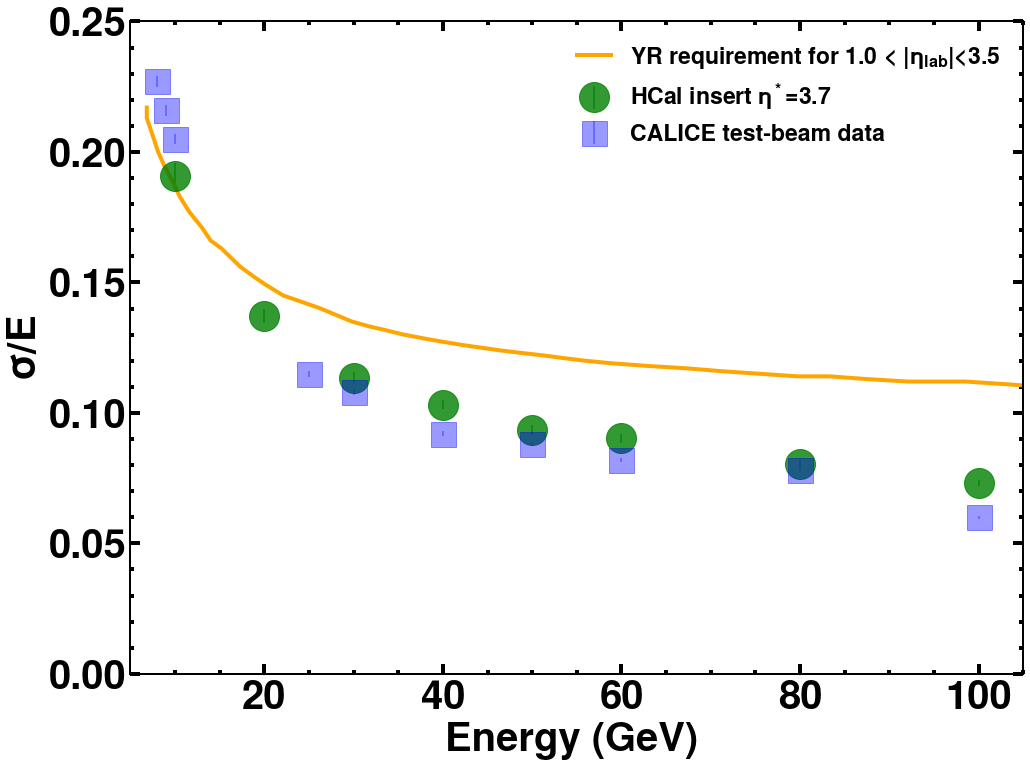

In [4]:
import pandas as pd
##cal_pi_res= 3.01,4.01,  4.98, 6.01,7.01,]
##energy_cal_pi=0.362,   0.325, 0.288,0.263,0.245,]
energy_cal_pi=[  8.02,   9.01,  9.99,  25,  30,     40,50,60,   80,100]
cal_pi_res=[   0.227,  0.216, 0.205, 0.115,0.108, 0.092,0.088,0.082,0.078,0.06]
cal_pi_res_err=np.multiply(cal_pi_res,0.01)

path_file = '/home/bishnu/UCR_EIC/EIC_Analysis/YR_report_pion.csv'
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
df = pd.read_csv(f'{path_file}',header=None, names=['energy', 'resolution'], index_col=False)
df=df.sort_values(by=['energy'],ascending =True)

ax.errorbar(energies_pi,pi_resolutions_FeW, pi_resolutions_errors_FeW,color="green",alpha=0.8,\
            linestyle='None',marker='o',markersize=30,label='HCal insert $\eta^*$=3.7')

ax.errorbar(energy_cal_pi,cal_pi_res, cal_pi_res_err,color="blue",marker='s',alpha=0.4,linestyle='None',\
            markersize=25,label='CALICE test-beam data')
df.plot(x='energy',y='resolution',linestyle='solid',linewidth=4,color='orange',ax=ax,\
        label='YR requirement for 1.0 < $|\eta_{lab}|$<3.5')
ax.set_ylabel('$\sigma$/E', loc='center')
ax.set_xlabel('Energy (GeV) ', loc='center')
#ax.set_title("HCAL insert")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.25)
ax.set_xlim(5,105)
plt.legend()
plt.show()

##  Plot HCal and HCAl +HCALI (Fe-W) leakage with energy at n=3.7

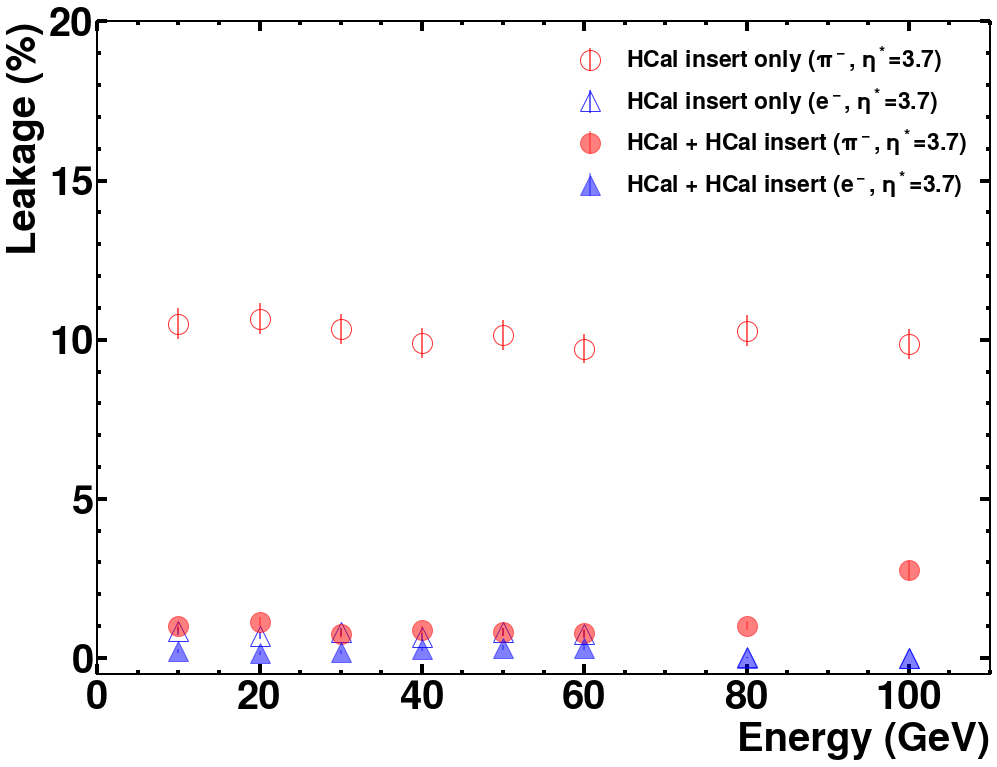

In [5]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW ,alpha=0.8,color="red",mfc='none',marker='o',markersize=20,\
            label='HCal insert only ($\pi^-$, $ \eta^*$=3.7) ',linestyle='None')

ax.errorbar(energies_pi,e_leaks_per_FeW, e_leaks_per_error_FeW,color="blue",alpha=0.8,marker='^',mfc='none',markersize=20,\
            label='HCal insert only ($e^-$, $ \eta^*$=3.7) ',linestyle='None' )

ax.errorbar(energies_pi,pi_leaks_per_E_Sum, pi_leaks_per_error_E_Sum,color="red",alpha=0.5,marker='o',markersize=20,\
            label='HCal + HCal insert ($\pi^-$, $ \eta^*$=3.7)',linestyle='None' )



ax.errorbar(energies_pi,e_leaks_per_E_Sum, e_leaks_per_error_E_Sum ,color="blue",alpha=0.5,marker='^',markersize=20,\
            label='HCal + HCal insert ($e^-$, $ \eta^*$=3.7) ',linestyle='None')



ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,20)
ax.set_xlim(0,110)

plt.legend()
plt.show()

## Resolution with $\eta$ , but at constant E= 50 GeV $\pi^-$

In [7]:
thetas=np.array([2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23])
#thetas=[2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23]

#  HCAL Insert only
pi_means_thetas=[474.46,480.38,491.69,497.37,497.05,487.31,469.19,423.83 ]
pi_means_error_thetas=[2.884,1.745,0.849,0.799,0.672,0.641,0.649,1.990 ]
pi_stds_thetas=[ 65.13,63.56,47.85,46.50,45.71,45.34,47.42,75.55 ]
pi_stds_error_thetas=[ 2.884,1.745,0.849,0.799,0.672,0.641,0.649,1.990 ]
pi_leaks_per_thetas=[ 26.180,17.900,13.380,10.160,7.380,4.980,4.840,8.460 ]
pi_leaks_per_error_thetas=[ 0.8128,0.6497,0.5508,0.4731,0.3981,0.3234,0.3186,0.4284 ]
pi_resolutions_thetas=[ 0.13727,0.13231,0.09732,0.09350,0.09195,0.09304,0.10108,0.17826 ]
pi_resolutions_errors_thetas=[ 0.0061,0.0037,0.0017,0.0016,0.0014,0.0013,0.0014,0.0048 ]

e_means_thetas=[449.63,445.83,444.17,451.51,455.46,456.86,457.17,450.58 ]
e_means_error_thetas=[0.650,0.623,0.864,0.615,0.441,0.343,0.347,0.407 ]
e_stds_thetas=[ 30.72,33.08,36.47,29.23,26.28,25.95,25.28,26.42 ]
e_stds_error_thetas=[ 0.650,0.623,0.865,0.616,0.442,0.343,0.347,0.408 ]
e_leaks_per_thetas=[ 5.080,2.380,0.640,0.800,0.320,0.280,0.080,0.120 ]
e_leaks_per_error_thetas=[ 0.3267,0.2208,0.1135,0.1270,0.0801,0.0749,0.0400,0.0490 ]
e_resolutions_thetas=[ 0.06831,0.07419,0.08211,0.06473,0.05770,0.05679,0.05529,0.05864 ]
e_resolutions_errors_thetas=[ 0.0014,0.0014,0.0020,0.0014,0.0010,0.0008,0.0008,0.0009 ]


## HCAL + HCAL Insert
pi_means_thetas_Sum=[543.51,549.15,563.42,579.15,593.06,612.10,640.72,701.28 ]
pi_means_error_thetas_Sum=[3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_stds_thetas_Sum=[ 86.57,82.94,69.35,67.86,69.53,73.93,86.02,132.18 ]
pi_stds_error_thetas_Sum=[ 3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_leaks_per_thetas_Sum=[ 12.397,5.586,1.306,0.824,0.584,0.462,0.404,0.350 ]
pi_leaks_per_error_thetas_Sum=[ 0.5291,0.3442,0.1630,0.1293,0.1087,0.0967,0.0904,0.0878 ]
pi_resolutions_thetas_Sum=[ 0.15927,0.15104,0.12310,0.11716,0.11724,0.12077,0.13426,0.18848 ]
pi_resolutions_errors_thetas_Sum=[ 0.0063,0.0029,0.0019,0.0021,0.0017,0.0019,0.0024,0.0053 ]


e_means_thetas_Sum=[452.95,450.16,448.35,454.60,458.02,459.60,461.33,472.64 ]
e_means_error_thetas_Sum=[0.680,0.472,0.343,0.485,0.368,0.328,0.352,0.593 ]
e_stds_thetas_Sum=[ 29.04,29.69,30.56,26.36,25.45,25.64,25.27,29.80 ]
e_stds_error_thetas_Sum=[ 0.680,0.472,0.344,0.485,0.369,0.329,0.352,0.594 ]
e_leaks_per_thetas_Sum=[ 2.620,0.980,0.280,0.320,0.180,0.120,0.160,0.000 ]
e_leaks_per_error_thetas_Sum=[ 0.2319,0.1407,0.0749,0.0801,0.0601,0.0490,0.0566,0.0000 ]
e_resolutions_thetas_Sum=[ 0.06412,0.06595,0.06816,0.05798,0.05557,0.05579,0.05477,0.06305 ]
e_resolutions_errors_thetas_Sum=[ 0.0015,0.0011,0.0008,0.0011,0.0008,0.0007,0.0008,0.0013 ]


### Weighted sum 
pi_means_thetas_wt_sum=[51.43,52.07,53.41,54.63,55.37,55.82,56.34,57.48 ]
pi_means_error_thetas_wt_sum=[0.200,0.111,0.091,0.093,0.086,0.091,0.076,0.116 ]
pi_stds_thetas_wt_sum=[ 6.95,6.87,5.47,5.32,5.32,5.20,4.99,5.72 ]
pi_stds_error_thetas_wt_sum=[ 0.200,0.111,0.091,0.093,0.086,0.091,0.076,0.116 ]
pi_leaks_per_thetas_wt_sum=[ 14.200,6.920,2.600,1.800,1.060,0.840,0.780,0.880 ]
pi_leaks_per_error_thetas_wt_sum=[ 0.5695,0.3847,0.2310,0.1914,0.1464,0.1302,0.1254,0.1332 ]
pi_resolutions_thetas_wt_sum=[ 0.13514,0.13192,0.10249,0.09730,0.09610,0.09317,0.08853,0.09949 ]
pi_resolutions_errors_thetas_wt_sum=[ 0.0039,0.0022,0.0017,0.0017,0.0016,0.0016,0.0014,0.0020 ]

etas=plots.get_eta(thetas)
np.set_printoptions(precision=2)
print(etas)


[3.93 3.9  3.8  3.7  3.6  3.5  3.4  3.3 ]


## Plot the resolution as function of eta (HCAL  only  or HCAL + HCAL Insert

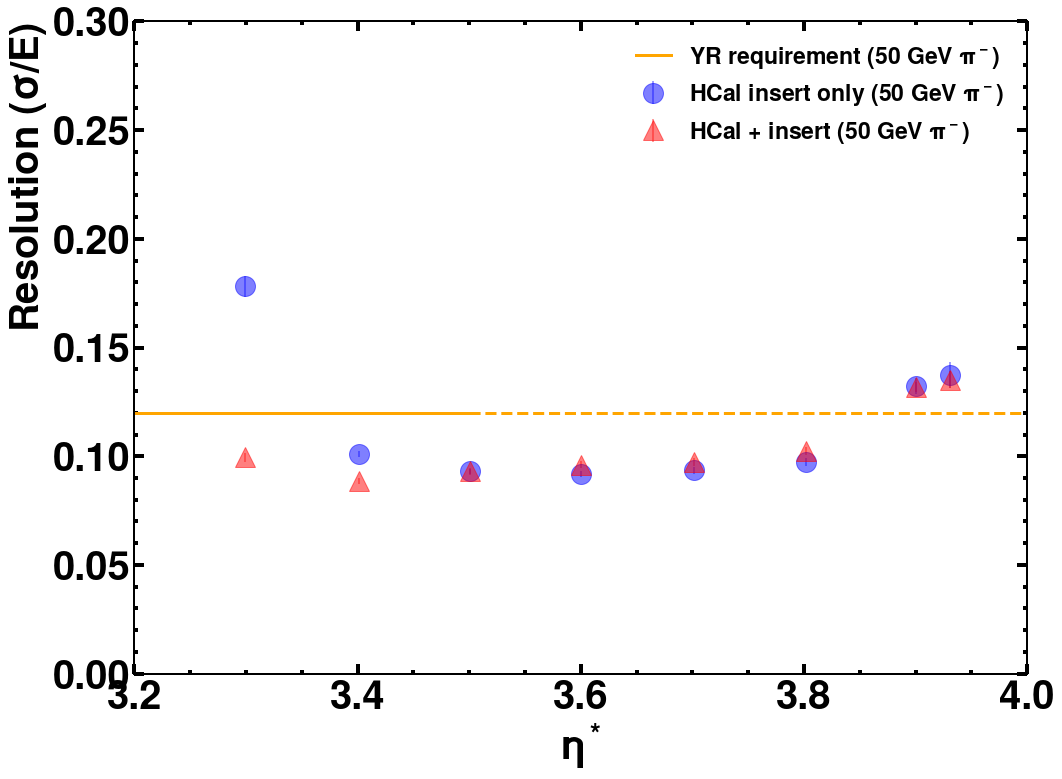

In [8]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(etas,pi_resolutions_thetas, pi_resolutions_errors_thetas ,alpha=0.5,color="blue",marker='o',markersize=20,\
            label='HCal insert only (50 GeV $\pi^-$)',linestyle='None')

ax.errorbar(etas,pi_resolutions_thetas_wt_sum, pi_resolutions_errors_thetas_wt_sum, alpha=0.5,color="red",\
            marker='^',markersize=20, label='HCal + insert (50 GeV $\pi^-$)',linestyle='None')

#ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("$\eta^*$", loc='center',fontsize=40)
#xlabel loc={loc!r}'
ax.set_ylabel('Resolution ($\sigma$/E)')
xlim=3.2
ax.set_ylim(0,0.30)
ax.set_xlim(xlim,4.0)
plt.plot([xlim,3.5],[0.12,0.12], color='orange', linewidth=3,label='YR requirement (50 GeV $\pi^-$)')
plt.plot([3.5,4.0],[0.12,0.12], color='orange', linewidth=3, linestyle='dashed',)
plt.legend()
plt.show() 

## Leakage with etas at constant Energy 50 GeV pion

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(etas,pi_leaks_per_thetas, pi_leaks_per_error_thetas,color="red",alpha=0.8,marker='o',markersize=20,\
            label='HCal insert only (50 GeV $\pi^-$)',linestyle='None',mfc='none' )

ax.errorbar(etas,e_leaks_per_thetas, e_leaks_per_error_thetas,color="blue",alpha=0.5,marker='^',markersize=20,\
            label='HCal insert only (50 GeV $e^-$)',linestyle='None' ,mfc='none')

ax.errorbar(etas,pi_leaks_per_thetas_Sum, pi_leaks_per_error_thetas_Sum,color="red",alpha=0.8,marker='o',markersize=20,\
            label='HCal insert + HCal (50 GeV $\pi^-$)',linestyle='None' )



ax.errorbar(etas,e_leaks_per_thetas_Sum, e_leaks_per_error_thetas_Sum,color="blue",alpha=0.5,marker='^',markersize=20,\
            label='HCal insert + HCal (50 GeV $e^-$)',linestyle='None' )

#ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("$\eta^*$",loc='center',fontsize=40)
ax.set_ylabel('Leakage (%)')
ax.set_ylim(-0.5,30)
ax.set_xlim(xlim,4.0)

plt.legend()
plt.show() 

## # e/h ratio with timiing cut
# with FTFP_BERT physics list
## AND WITH FTFP_BERT_HP (PHYSICS LIST)

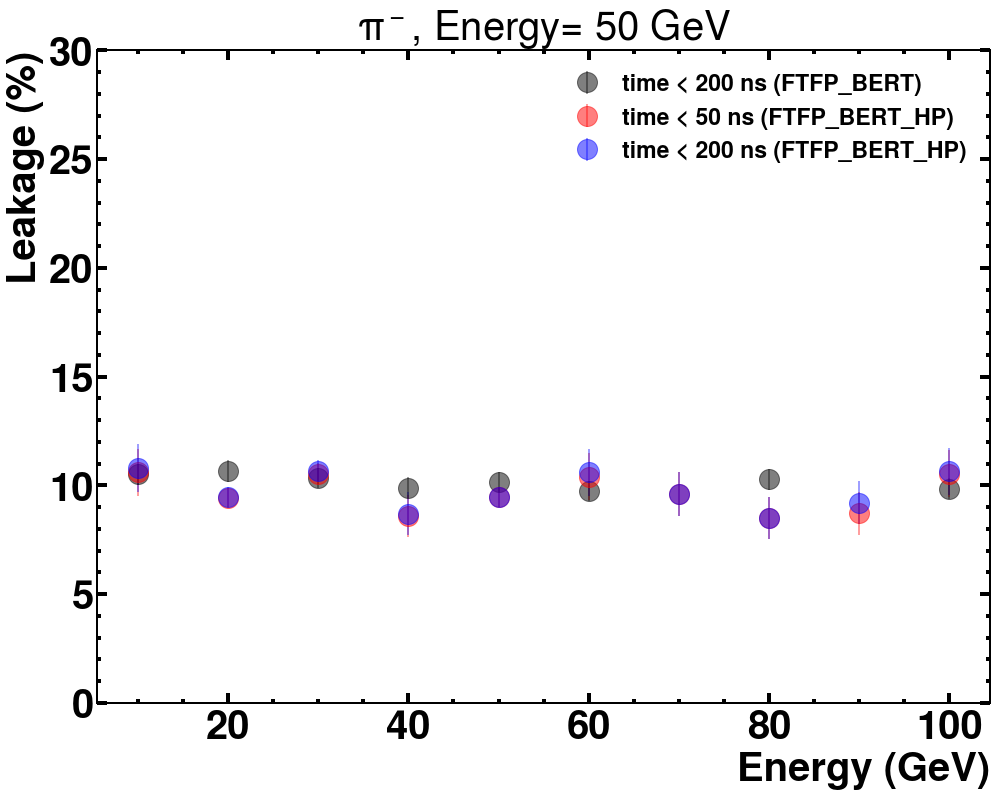

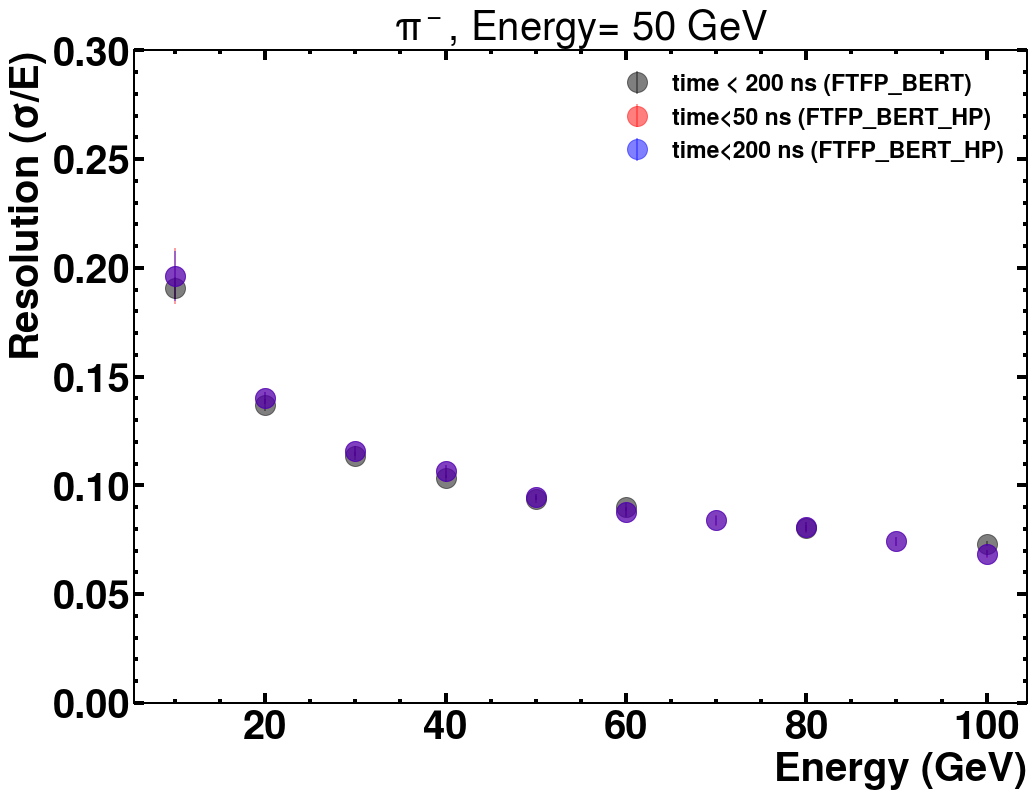

In [12]:
## THESE ARE THE NUMBERS FORM THE RYAN FILE WITH FTFP_BERT_HP (PHYSICS LIST)
# TIMING CUT 150 NS
energies=[10,20,30,40,50,60,70,80,90,100]
energies_pi=[10,20,30,40,50,60,80, 100]
pi_means_200=[94.6,193.38,291.97,390.82,489.62,590.49,683.89,781.30,883.94,985.28 ]
pi_means_error_200=[0.923,0.532,0.626,1.156,0.687,1.266,1.437,1.811,1.901,1.666 ]
pi_stds_200=[ 17.98,26.12,32.84,40.96,46.07,51.08,57.79,64.45,65.89,67.54 ]
pi_stds_error_200=[ 1.078,0.532,0.626,1.156,0.687,1.266,1.437,1.811,1.901,1.666 ]
pi_leaks_per_200=[ 10.800,9.480,10.680,8.700,9.480,10.600,9.610,8.509,9.209,10.643 ]
pi_leaks_per_error_200=[ 1.0939,0.4556,0.4862,0.9725,0.4556,1.0828,1.0268,0.9613,1.0034,1.0873 ]
pi_resolutions_200=[ 0.19006,0.13507,0.11247,0.10480,0.09409,0.08651,0.08450,0.08249,0.07454,0.06855 ]
pi_resolutions_errors_200=[ 0.0116,0.0028,0.0022,0.0030,0.0014,0.0022,0.0021,0.0023,0.0022,0.0017 ]


e_means_200=[86.57,177.68,268.05,358.10,450.94,533.48,607.50,669.82,729.96,779.06 ]
e_means_error_200=[0.377,0.384,0.776,0.962,0.503,0.848,1.287,1.720,1.777,2.384 ]
e_stds_200=[ 13.23,18.44,21.82,26.52,28.05,31.27,37.02,48.50,58.31,70.33 ]
e_stds_error_200=[ 0.402,0.384,0.776,0.963,0.503,0.849,1.290,1.726,1.782,2.390 ]
e_leaks_per_200=[ 0.900,0.920,1.500,0.700,0.920,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_200=[ 0.3013,0.1363,0.3902,0.2655,0.1363,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_200=[ 0.15283,0.10377,0.08141,0.07405,0.06220,0.05861,0.06094,0.07241,0.07988,0.09027 ]
e_resolutions_errors_200=[ 0.0047,0.0022,0.0029,0.0027,0.0011,0.0016,0.0021,0.0026,0.0024,0.0031 ]

# TIMING CUT 150 NS

pi_means_150=[93.33,191.54,289.43,387.64,485.94,586.04,678.88,776.00,878.05,978.78 ]
pi_means_error_150=[0.894,0.508,0.676,0.950,0.696,1.365,1.645,1.702,1.899,1.542 ]
pi_stds_150=[ 17.52,26.02,32.68,40.65,45.70,50.72,57.07,63.50,65.71,66.77 ]
pi_stds_error_150=[ 1.075,0.508,0.676,0.950,0.696,1.365,1.645,1.702,1.899,1.542 ]
pi_leaks_per_150=[ 10.900,9.520,10.720,8.600,9.540,10.500,9.610,8.609,9.209,10.643 ]
pi_leaks_per_error_150=[ 1.0995,0.4566,0.4872,0.9664,0.4572,1.0771,1.0268,0.9674,1.0034,1.0873 ]
pi_resolutions_150=[ 0.18771,0.13584,0.11291,0.10486,0.09404,0.08655,0.08407,0.08183,0.07484,0.06821 ]
pi_resolutions_errors_150=[ 0.0117,0.0027,0.0023,0.0025,0.0014,0.0023,0.0024,0.0022,0.0022,0.0016 ]


e_means_150=[86.57,177.65,268.01,358.05,450.89,533.43,607.45,669.76,729.88,778.99 ]
e_means_error_150=[0.405,0.366,0.781,0.995,0.502,0.894,1.191,1.703,1.735,2.441 ]
e_stds_150=[ 13.24,18.45,21.85,26.54,28.05,31.33,37.00,48.45,58.31,70.33 ]
e_stds_error_150=[ 0.406,0.366,0.781,0.997,0.502,0.895,1.193,1.709,1.741,2.447 ]
e_leaks_per_150=[ 0.900,0.920,1.200,0.700,0.940,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_150=[ 0.3013,0.1363,0.3485,0.2655,0.1378,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_150=[ 0.15296,0.10383,0.08153,0.07412,0.06221,0.05874,0.06090,0.07234,0.07989,0.09029 ]
e_resolutions_errors_150=[ 0.0047,0.0021,0.0029,0.0028,0.0011,0.0017,0.0020,0.0026,0.0024,0.0032 ]

# TIMING CUT 100 NS
pi_means_100=[91.79,188.64,285.42,382.63,479.95,579.30,671.03,767.47,868.43,968.65 ]
pi_means_error_100=[0.861,0.568,0.605,0.988,0.614,1.141,1.491,1.910,1.820,1.700 ]
pi_stds_100=[ 17.28,25.87,32.34,40.24,45.20,50.12,56.29,62.16,64.68,66.53 ]
pi_stds_error_100=[ 1.057,0.568,0.605,0.988,0.614,1.141,1.491,1.910,1.820,1.700 ]
pi_leaks_per_100=[ 11.100,9.460,10.640,8.600,9.420,10.500,9.610,8.509,8.809,10.643 ]
pi_leaks_per_error_100=[ 1.1105,0.4551,0.4852,0.9664,0.4540,1.0771,1.0268,0.9613,0.9795,1.0873 ]
pi_resolutions_100=[ 0.18828,0.13715,0.11331,0.10517,0.09417,0.08652,0.08388,0.08100,0.07448,0.06869 ]
pi_resolutions_errors_100=[ 0.0117,0.0030,0.0021,0.0026,0.0013,0.0020,0.0022,0.0025,0.0021,0.0018 ]

e_means_100=[86.55,177.61,267.98,357.99,450.80,533.35,607.37,669.58,729.74,778.82 ]
e_means_error_100=[0.400,0.366,0.781,0.987,0.499,0.980,1.214,1.643,1.774,2.587 ]
e_stds_100=[ 13.25,18.43,21.87,26.54,28.02,31.33,36.94,48.51,58.28,70.30 ]
e_stds_error_100=[ 0.400,0.366,0.781,0.988,0.499,0.981,1.216,1.649,1.780,2.593 ]
e_leaks_per_100=[ 0.900,0.920,1.200,0.700,0.940,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_100=[ 0.3013,0.1363,0.3485,0.2655,0.1378,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_100=[ 0.15308,0.10379,0.08161,0.07412,0.06216,0.05874,0.06083,0.07245,0.07987,0.09027 ]
e_resolutions_errors_100=[ 0.0047,0.0021,0.0029,0.0028,0.0011,0.0018,0.0020,0.0025,0.0024,0.0033 ]

## Timing cut 50 ns 
pi_means_50=[88.59,182.96,277.44,372.87,467.82,565.18,654.83,749.30,848.50,946.10 ]
pi_means_error_50=[0.886,0.488,0.594,1.057,0.637,0.967,1.702,1.810,1.664,1.728 ]
pi_stds_50=[ 17.39,25.67,32.16,39.68,44.19,49.59,55.00,60.46,63.01,64.86 ]
pi_stds_error_50=[ 1.127,0.488,0.594,1.057,0.637,0.967,1.702,1.810,1.664,1.728 ]
pi_leaks_per_50=[ 10.600,9.420,10.540,8.600,9.480,10.400,9.610,8.509,8.709,10.542 ]
pi_leaks_per_error_50=[ 1.0828,0.4540,0.4827,0.9664,0.4556,1.0715,1.0268,0.9613,0.9735,1.0817 ]
pi_resolutions_50=[ 0.19635,0.14030,0.11591,0.10641,0.09447,0.08775,0.08399,0.08069,0.07426,0.06856 ]
pi_resolutions_errors_50=[ 0.0130,0.0027,0.0022,0.0029,0.0014,0.0017,0.0026,0.0024,0.0020,0.0018 ]


e_means_50=[86.49,177.52,267.95,357.84,450.62,533.07,607.05,669.35,729.44,778.44 ]
e_means_error_50=[0.406,0.387,0.767,0.910,0.528,0.952,1.298,1.600,1.724,2.428 ]
e_stds_50=[ 13.28,18.41,21.82,26.54,28.05,31.37,36.95,48.50,58.30,70.25 ]
e_stds_error_50=[ 0.406,0.387,0.767,0.912,0.528,0.953,1.300,1.606,1.729,2.434 ]
e_leaks_per_50=[ 0.900,0.940,1.200,0.700,0.960,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_50=[ 0.3013,0.1378,0.3485,0.2655,0.1392,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_50=[ 0.15357,0.10368,0.08144,0.07418,0.06224,0.05884,0.06087,0.07245,0.07993,0.09024 ]
e_resolutions_errors_50=[ 0.0047,0.0022,0.0029,0.0026,0.0012,0.0018,0.0021,0.0024,0.0024,0.0031 ]





### LEAKS WITH AND WIHTOUT BERT
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)



ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW,color="black",alpha=0.5,marker='o',markersize=20,\
            label='time < 200 ns (FTFP_BERT) ',linestyle='None' )

ax.errorbar(energies,pi_leaks_per_50, pi_leaks_per_error_50,color="red",alpha=0.5,marker='o',markersize=20,\
            label='time < 50 ns (FTFP_BERT_HP)',linestyle='None' )


ax.errorbar(energies,pi_leaks_per_200, pi_leaks_per_error_200,color="blue",alpha=0.5,marker='o',markersize=20,\
            label='time < 200 ns (FTFP_BERT_HP)',linestyle='None' )

ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Leakage (%)')
ax.set_ylim(0,30)

plt.legend()
plt.show() 


###  RESOLUTION WITH AND WITHOUT BERT
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_resolutions_FeW, pi_resolutions_errors_FeW ,alpha=0.5,color="black",marker='o',markersize=20,\
            label='time < 200 ns (FTFP_BERT)',linestyle='None')


ax.errorbar(energies,pi_resolutions_50, pi_resolutions_errors_50 ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='time<50 ns (FTFP_BERT_HP)',linestyle='None')

ax.errorbar(energies,pi_resolutions_50, pi_resolutions_errors_200, alpha=0.5,color="blue",marker='o',markersize=20,\
            label='time<200 ns (FTFP_BERT_HP)',linestyle='None')

ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_ylim(0,0.30)

plt.legend()
plt.show() 


def convert_to_MIP(pi_mean,e_mean,pi_mean_error,e_mean_error):
    MIP_insert=0.6
    pi_means=np.divide(pi_mean,MIP_insert)
    e_means=np.divide(e_mean,MIP_insert)
    pi_means_error=np.divide(pi_mean_error,MIP_insert)
    e_means_error=np.divide(e_mean_error,MIP_insert)

    ratio_hole=np.divide(e_means,pi_means)
    error_A=(pi_means_error/pi_means)**2 + (e_means_error/e_means)**2
    ratio_hole_error=np.sqrt(error_A)*ratio_hole
    
    return pi_means,e_means,pi_means_error,e_means_error,ratio_hole,ratio_hole_error


## This is the plot to have e/h for paper with FTFP_BERT_HP and 50 ns time cut 

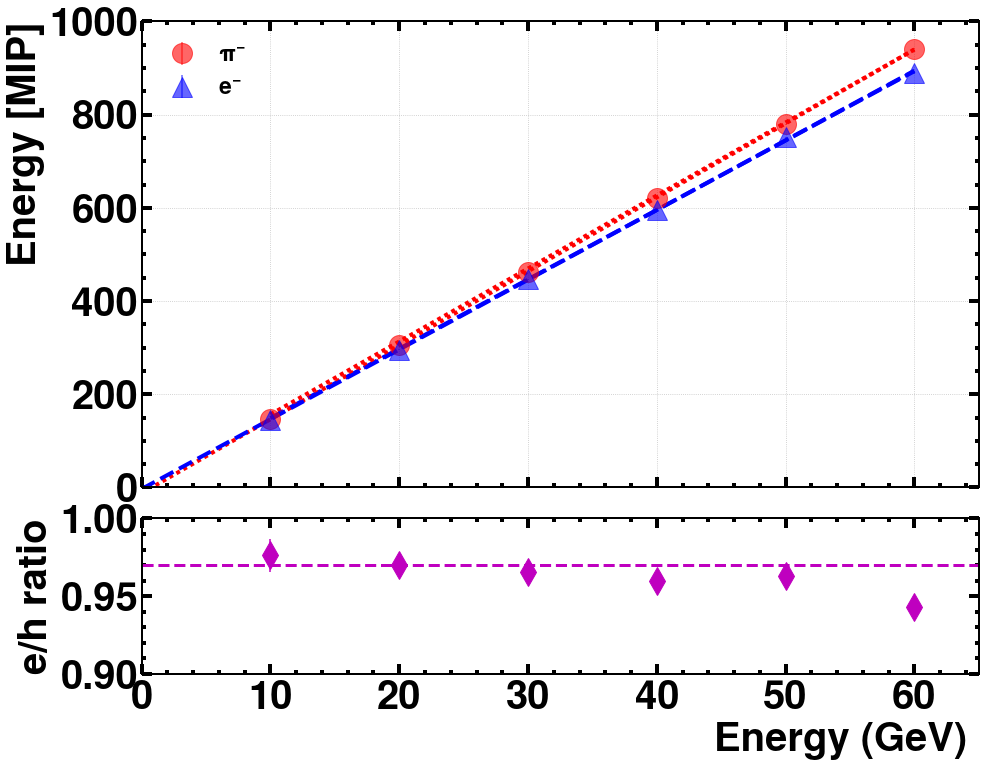

In [13]:
pi_means_50_MIP,e_means_50_MIP,pi_means_error_50_MIP,e_means_error_50_MIP,ratio_hole_50_MIP,\
ratio_hole_error_50_MIP=convert_to_MIP(pi_means_50,e_means_50,pi_means_error_50,e_means_error_50)

fig,(ax,ax1) = plt.subplots(2,1,figsize=(15, 12),gridspec_kw={'height_ratios': [3, 1]},sharex=True)

ax.errorbar(energies, pi_means_50_MIP, pi_means_error_50_MIP ,color="red",alpha=0.6,marker='o',linestyle='None',markersize=20,label='$\pi^{-}$')
ax.errorbar(energies,e_means_50_MIP, e_means_error_50_MIP,color="blue",alpha=0.6,marker='^',linestyle='None',markersize=20,label='$e^{-}$')
ax.set_ylabel('Energy [MIP]')
#ax.set_xlabel('Energy (GeV) ')



energies=np.asarray(energies)
mask=(energies<65)
#slope=popt[0]
#

popt_pi,_popcov=curve_fit(plots.linear_fit,energies,pi_means_50_MIP,p0=[0,25],bounds=(0,101))
popt_e,_popcov=curve_fit(plots.linear_fit,energies[mask],e_means_50_MIP[mask],p0=[0,10],bounds=(0,101))
c1=popt_pi[1]
ax.plot(energies[mask],plots.linear_fit(energies[mask],*popt_pi),color='r',linewidth='4',\
        linestyle=(0,(1,1)))


ax.plot(energies[mask],plots.linear_fit(energies[mask],*popt_e),color='b',linewidth='4',\
        linestyle='dashed')

z = np.polyfit(energies[mask], pi_means_50_MIP[mask], 1)
f = np.poly1d(z)
ax.plot((0, max(energies[mask])), (f(0), f(max(energies[mask]))),  color='r',linewidth='4',\
        linestyle=(0,(1,1)))
#ax.plot((0, max(energies[mask])), (f(0), (f(max(energies[mask]))),'r'))


z_e = np.polyfit(energies[mask], e_means_50_MIP[mask], 1)
f_e = np.poly1d(z_e)
ax.plot((0, max(energies[mask])), (f_e(0), f_e(max(energies[mask]))),  color='b',linewidth='4',\
        linestyle='dashed')
        
'''    
xlims = plt.xlim()
energies.insert(0, xlims[0])
pi_means_50_MIP.insert(0, np.polyval(p1, xlims[0]))
x.append(xlims[1])
y.append(np.polyval(p1, xlims[1]))
plt.plot(x, np.polyval(p1,x), 'r-', linewidth = 1.5)
plt.xlim(xlims)
'''

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,1000)
ax.set_xlim(0,75)
#ax.set_title("Fe-AHCAL ($\pi^-$)")

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)


ax1.errorbar(energies,ratio_hole_50_MIP,ratio_hole_error_50_MIP,marker='d',markersize='20',color='m',\
             linestyle='None')
ax1.set_ylim(0.90,1)
ax1.set_xlim(0,65)
ax1.yaxis.set_major_locator(MultipleLocator(0.05))   
ax1.set_xlabel('Energy (GeV) ')
ax1.set_ylabel('e/h ratio')
ax1.axhline(0.97,color='m',linewidth=3, linestyle='dashed')

plt.subplots_adjust(wspace=0, hspace=0.10)
#plt.tight_layout()
ax.legend(loc='upper left')